In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

#read csv data into a data frame
df = pd.read_csv('/Users/kriti/Desktop/loan_prediction/loan_train.csv')
df.shape

(614, 13)

In [3]:
#prints the columns names
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
#prints the first 10 rows
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


#BOOLEAN INDEXING
#Creating a subset based on conditions on existing columns

In [6]:
#Data exploration - E.x. Non graduate women that recieved loan
df.loc[(df['Gender'] == 'Female') & (df['Education'] == 'Not Graduate') & (df['Loan_Status'] == 'Y')] [['Gender','Education', 'Loan_Status']]

,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [241]:
#Apply function - Here it is used to apply the missing values function

In [7]:
#Find the missing values in columns (axis = 0)
def na_vals(x):
    return sum(x.isnull())

df.apply(na_vals, axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
#Find missing values in rows, displaying last 10 rows
df.apply(na_vals, axis = 1).head(10)

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

#imputing missing values with mean/median/mode

In [9]:
#displays just the mode 
df['Gender'].mode()

0    Male
dtype: object

In [10]:
#pass the index of mode() since it returns a series of objects
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0], inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace = True)

In [11]:
#Missing values for Gender, married, self_employed been filled with mode
df.apply(na_vals, axis = 0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [158]:
#impute missing values of LoanAmount
impute_grp = pd.pivot_table(df, values = 'LoanAmount', index = ['Gender', 'Married', 'Self_Employed'], 
                            aggfunc = np.mean)

In [159]:
impute_grp

LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833

In [164]:
#iterate through the row, cols of LoanAmount = 0
for i, row in df.loc[df['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Gender'], row['Married'], row['Self_Employed']])
    df.loc[i, 'LoanAmount'] = impute_grp.loc[ind].values[0]
    
#missing LoanAmount is filled with the mean values from impute_grp
df.apply(na_vals, axis = 0)

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [313]:
#Understand the basic relation between variables - For e.x. Loan_status could be affected by credit history
#In reality, people with credit history are more likely to get loans
pd.crosstab(index = [df['Credit_History'], df['Gender']], columns = df['Loan_Status'], margins = True)

Loan_Status              N    Y  All
Credit_History Gender               
0.0            Female   16    1   17
               Male     66    6   72
1.0            Female   20   64   84
               Male     77  314  391
All                    179  385  564

In [169]:
#Finding percentages of the above gives much clearer information
def per_convert(y):
    return y/float(y[-1])

#apply the per_convert function along the row, axis = 1
#From the result it is clear that 80% of people with credit history are given loan. This shows that the chance of giving
#loan increases with credit history. 
# 378+82 = 460/614 = 75% of the chance the prediction of Loan status Y with credit history Y and otherwise Loan_status N will be right
pd.crosstab(index = df['Credit_History'], columns = df['Loan_Status'], margins = True).apply(per_convert, axis = 1)

Loan_Status,N,Y,All
Credit_History,,,
0.0,0.921348,0.078652,1.0
1.0,0.204211,0.795789,1.0
All,0.317376,0.682624,1.0


In [175]:
#sorting dataframes 
df_sorted = df.sort_values(['ApplicantIncome', 'CoapplicantIncome'], ascending = False)
df_sorted[['ApplicantIncome', 'CoapplicantIncome']].head(10)

,ApplicantIncome,CoapplicantIncome
409,81000,0.0
333,63337,0.0
171,51763,0.0
155,39999,0.0
185,39147,4750.0
443,37719,0.0
183,33846,0.0
126,23803,0.0
506,20833,6667.0
284,20667,0.0


In [10]:
#Numerical variables summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#Loan amount is missing (614-592 = 22) values
#Loan_amount_term is missing (614 - 600 = 14) values
#Credit_History is missing ( 614 - 564 = 50) values
#Credit_history has 1 for people with credit history and 0 for people without credit history - Since the mean is 0.84 about 84% of the people have credit history

In [11]:
#Frequency of each category of property area
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

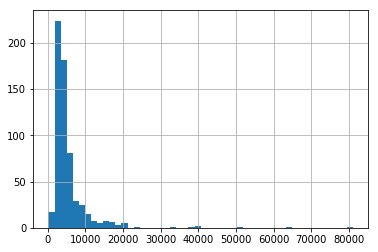

In [16]:
#This shows the presence of outliers/extreme values
df.ApplicantIncome.hist(bins = 50)

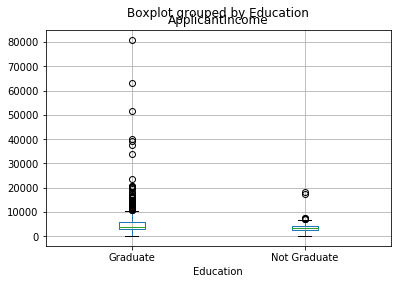

In [19]:
#Mean remains almost the same for the graduate and non graduates
#But Graduates also a number of people with highest income levels
#Can be attributed to income disparity
df.boxplot(column = 'ApplicantIncome', by = 'Education')

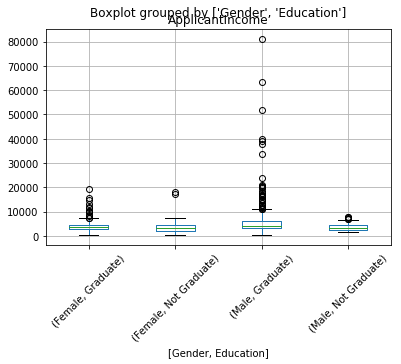

In [318]:
#Applicant income grouped by gender
#Can be attributed to income inequality
df.boxplot(column = 'ApplicantIncome', by = ['Gender', 'Education'], rot = 45)

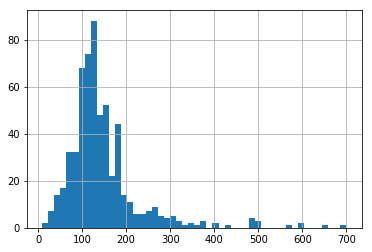

In [27]:
#Loanamount distribution
df.LoanAmount.hist(bins = 50)

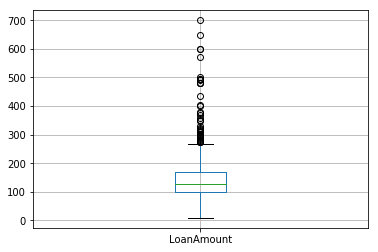

In [28]:
df.boxplot(column = 'LoanAmount')

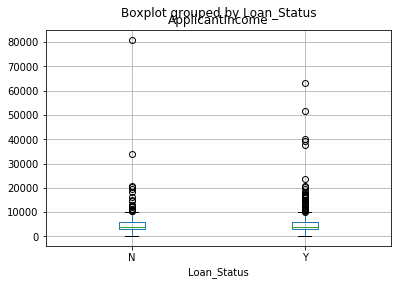

In [177]:
#applicant income by loan status
df.boxplot(column = 'ApplicantIncome', by = 'Loan_Status')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a18acc978>,
      dtype=object)

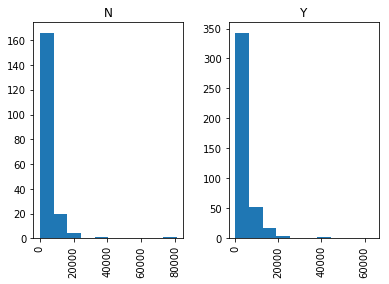

In [180]:
#looks like income is not a huge deciding factor for giving loans since there is no appreciable difference 
df.hist(column = 'ApplicantIncome', by = 'Loan_Status')

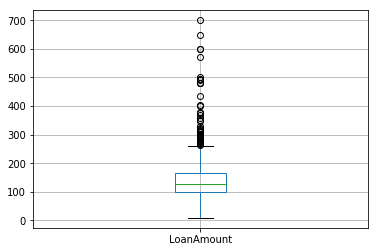

In [188]:
#When values are of wide range it would be better if they were binned. Here LoanAmount can be binned
df.boxplot(column = ['LoanAmount'])

In [207]:
#Binning:
def binning(col, cut_points, labels=None):
    #Define min and max values:
    minval = col.min()
    maxval = col.max()
    
    #create list by adding min and max to cut_points
    break_points = [minval] + cut_points + [maxval]
    
    #if no labels provided, use default labels 0 ... (n-1)
    if not labels:
        labels = range(len(cut_points)+1)
        
    #Binning using cut function of pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low", "medium", "high", "very high"]
df["LoanAmount_Bin"] = binning(df["LoanAmount"], cut_points, labels)


In [232]:
def coding(col, coldict):
    colum = pd.Series(col, copy = True)
    for key, value in coldict.items():
        colum.replace(key, value, inplace = True)
    return colum

#coding nominal data
print('Before coding:')
print(df['Loan_Status'].value_counts())
print('After coding:')
df['Coded_Loan_Status'] = coding(df['Loan_Status'], {'Y': 1, 'N': 0})
print(df['Coded_Loan_Status'].value_counts())

Before coding:
Y    422
N    192
Name: Loan_Status, dtype: int64
After coding:
1    422
0    192
Name: Coded_Loan_Status, dtype: int64


In [236]:
#check the datatypes of the columns
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Coded_Loan_Status       int64
dtype: object

In [238]:
#We know that credit history is categorical but it shows float64. 
#In order to change the dtype load the csv with correct dtypes
correct_dtype = pd.read_csv('/Users/kriti/Desktop/loan_prediction/datatypes.csv')
correct_dtype

,feature,type
0,Loan_ID,categorical
1,Gender,categorical
2,Married,categorical
3,Dependents,categorical
4,Education,categorical
5,Self_Employed,categorical
6,ApplicantIncome,continuous
7,CoapplicantIncome,continuous
8,LoanAmount,continuous
9,Loan_Amount_Term,continuous


In [239]:
#categorical as object type and continuous as float type
for i, row in correct_dtype.iterrows():
    if row['type'] == 'categorical':
        df[row['feature']] = df[row['feature']].astype(np.object)
    elif row['type'] == 'continuous':
        df[row['feature']] = df[row['feature']].astype(np.float64)

In [240]:
#credit history dtype changed from float to object
#loanamount_bin and status were computed fields - ignore them
df.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History         object
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Coded_Loan_Status       int64
dtype: object

In [284]:
print('Frequency table for credit history:')
ch_freq = df['Credit_History'].value_counts(ascending = True)
print(ch_freq)
print('\nProbability of getting loan for each credit class:')
loan_prob = df.pivot_table(values = 'Loan_Status', index = 'Credit_History', 
                           aggfunc = lambda x : (x.map({'Y': 1, 'N': 0}).mean() ))
print((loan_prob).round(2))

Frequency table for credit history:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each credit class:
                Loan_Status
Credit_History             
0.0                    0.08
1.0                    0.80


Text(0.5, 1.0, 'Probability of getting loan by credit history')

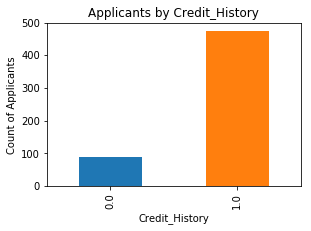

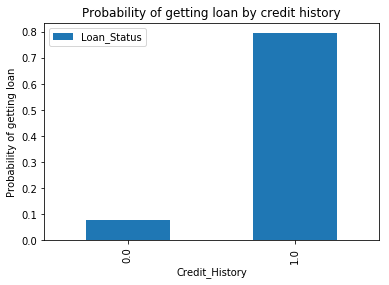

In [305]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,3)) 

#credit history frequency table
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants') 
ax1.set_title("Applicants by Credit_History") 
ch_freq.plot(kind='bar') 

#probability of getting loan based on credit history
ax2 = loan_prob.plot(kind = 'bar')
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by credit history")
 

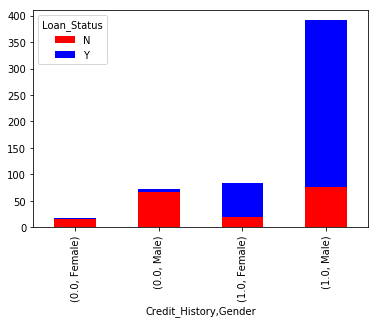

In [315]:
#combining the #of loan applicants with probability
combine = pd.crosstab(index = [df['Credit_History'],df['Gender']], columns = df['Loan_Status'])

combine.plot(kind = 'bar', stacked=True, color=['red','blue'], grid=False)

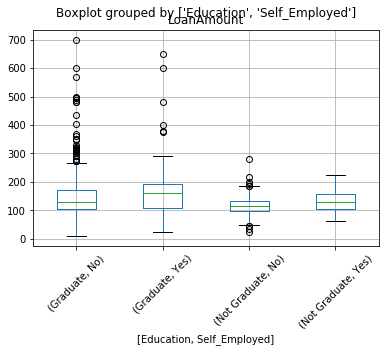

In [320]:
#How does the median loan amount for self-employed educated people look?
df.boxplot(column = 'LoanAmount', by = ['Education', 'Self_Employed'], rot = 45)

In [331]:
#Lets see if there are any missing values for education, loanamt, self-employed
df['LoanAmount'].isnull().sum()


0

In [327]:
df['Education'].isnull().sum()

0

In [328]:
df['Self_Employed'].isnull().sum()

0

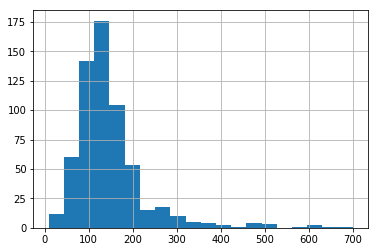

In [336]:
df['LoanAmount'].hist(bins=20)

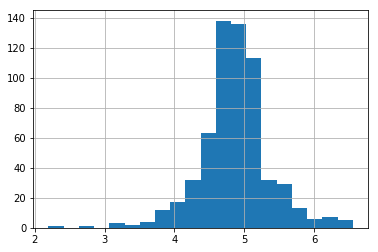

In [339]:
#log transformation on loan amount to nullify the effect created by extreme loan amounts (since its possible to apply
#for huge loan amounts practically)
#This looks more like a normal distribution without outliers
df['LoanAmount_log'] = np.log(df['LoanAmount']) 
df['LoanAmount_log'].hist(bins=20)

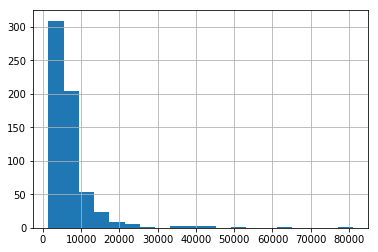

In [340]:
#Some applicants may have low income but loan is based on applicant & coapplicant incomes.
#So it would be better to add these 2
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome'] 
df['TotalIncome'].hist(bins = 20)

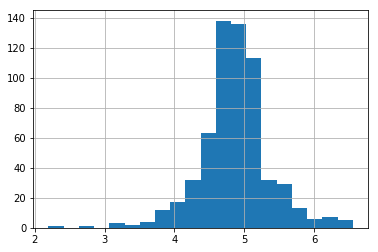

In [342]:
#Log transformation on totalincome to combat the effect of outliers
df['TotalIncome_log'] = np.log(df['TotalIncome']) 
df['LoanAmount_log'].hist(bins=20) 

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.groupby('Gender')['Education'].value_counts()

Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        376
        Not Graduate    113
Name: Education, dtype: int64

In [11]:
df.loc[df['LoanAmount'] == 128.0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
211,LP001711,Male,Yes,3+,Graduate,No,3430,1250.0,128.0,360.0,0.0,Semiurban,N
224,LP001750,Male,Yes,0,Graduate,No,6250,0.0,128.0,360.0,1.0,Semiurban,Y
259,LP001864,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban,N
264,LP001872,Male,No,0,Graduate,Yes,5166,0.0,128.0,360.0,1.0,Semiurban,Y
380,LP002226,Male,Yes,0,Graduate,NaN,3333,2500.0,128.0,360.0,1.0,Semiurban,Y
383,LP002234,Male,No,0,Graduate,Yes,7167,0.0,128.0,360.0,1.0,Urban,Y
461,LP002484,Male,Yes,3+,Graduate,No,7740,0.0,128.0,180.0,1.0,Urban,Y
482,LP002537,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
543,LP002755,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban,Y
